<a href="https://colab.research.google.com/github/KumudaBG/DeepLearning-Assignment1/blob/main/part1/fastai_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FAST.AI implementation**
using the package fast.ai we are implementing the below:
* cnn_learner
* unet_learner
* text_classifier_learner
* tabular_learner
* collab_learner

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.0MB/s 
     |████████████████████████████████| 194kB 20.4MB/s 
     |████████████████████████████████| 1.2MB 13.1MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [ ]:
pip install fastai==2.2.5

In [ ]:
from fastai.vision.all import *

download and decompress dataset from the collection fast.ai

In [ ]:
pets_path = untar_data(URLs.PETS)/'images'


method returns true if the filename starts with lowercase

In [ ]:
def is_dog(x): return x[0].islower()

#**cnn_learner**


* ImageDataLoaders - load the images
* item_tfms - predefined Transform to resize the item to 224 pixels
* valid_pct - validation set 20%, training set 80%
* label_func- check if the image is dog
* seed=42 set the random seed to a particular value/same validation set

In [ ]:
dataloader = ImageDataLoaders.from_name_func(
    pets_path, get_image_files(pets_path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

* cnn- convolution neural network
* resnet- architecture with 34 layers
* metrics- method to measure the quality of prediction (error_rate or accuracy)

In [ ]:
learner = cnn_learner(dataloader, resnet34, metrics=error_rate)
#fit the model
learner.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.149843,0.032508,0.009472,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.058830,0.043804,0.012855,00:49


Predict the learner

In [ ]:
from google.colab import files
#upload any type of file- download and upload dog image to predict the model 
uploaded = files.upload()

Saving dog.jpeg to dog (1).jpeg


In [ ]:
image_uploader = SimpleNamespace(data = ['/content/dog.jpeg'])
image = PILImage.create(image_uploader.data[0])
is_dog,_,probabiltiy = learner.predict(image)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probabiltiy[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 1.000000


#**unet_learner**

In [ ]:
#download dataset from the collection fast.ai
camvid_dataset_path = untar_data(URLs.CAMVID_TINY)
segment_dataloader = SegmentationDataLoaders.from_label_func(
    camvid_dataset_path, bs=8, fnames = get_image_files(camvid_dataset_path/"images"),
    label_func = lambda o: camvid_dataset_path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(camvid_dataset_path/'codes.txt', dtype=str)
)


In [ ]:
segmentation_learner = unet_learner(segment_dataloader, resnet34)
segmentation_learner.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.688349,2.148875,00:03


epoch,train_loss,valid_loss,time
0,1.648955,1.402603,00:01
1,1.478554,1.263007,00:01
2,1.350257,1.053932,00:01
3,1.234764,1.056989,00:01
4,1.112811,0.734579,00:01
5,1.007107,0.715171,00:01
6,0.920958,0.696963,00:01
7,0.854305,0.697876,00:01


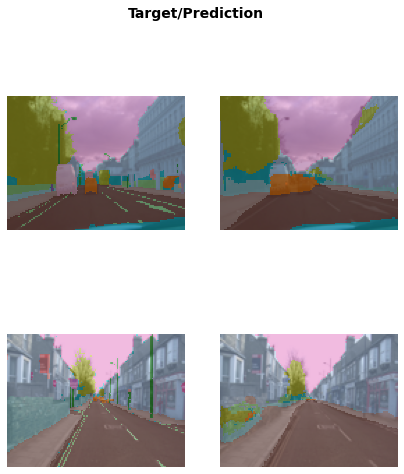

In [ ]:
segmentation_learner.show_results(max_n=6, figsize=(7,8))

#**text_classifier_learner**

In [ ]:
from fastai.text.all import *

text_dataloader = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
text_learner = text_classifier_learner(text_dataloader, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
text_learner.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.460461,0.394550,0.822160,04:09


epoch,train_loss,valid_loss,accuracy,time
0,0.302861,0.252583,0.900720,07:57
1,0.235648,0.205542,0.919600,07:59
2,0.181898,0.204264,0.918560,07:58
3,0.141633,0.187162,0.929840,07:58


In [ ]:
text_learner.predict("I love to watch old Kannada movie!")

('pos', tensor(1), tensor([0.0020, 0.9980]))

#**tabular_learner**

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

#cat_names-categorical columns
#cont_names-continous columns
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])
#predict a particular column of the row based on others column contents of the same row
# predict the label-salary
learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
#fit_one_cycle- method to train fastai models from beginning
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.372007,0.355904,0.831542,00:04
1,0.350905,0.344327,0.841830,00:05
2,0.343593,0.341285,0.842752,00:04


#**collab_learner**

In [ ]:
#To generate a recommendation model from previous view habits
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.524304,1.434204,00:00


epoch,train_loss,valid_loss,time
0,1.371642,1.373806,00:00
1,1.260793,1.186802,00:00
2,1.022017,0.875455,00:00
3,0.792880,0.738791,00:00
4,0.683682,0.706536,00:00
5,0.647467,0.696278,00:00
6,0.631515,0.692509,00:00
7,0.611620,0.690366,00:00
8,0.613339,0.689921,00:00
9,0.609980,0.689694,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,51.0,70.0,3.0,3.763051
1,36.0,80.0,3.5,4.230624
2,75.0,68.0,5.0,3.776283
3,18.0,29.0,4.0,3.935529
4,67.0,63.0,4.0,3.435825
5,8.0,98.0,5.0,4.425203
6,38.0,82.0,4.5,4.419527
7,62.0,92.0,5.0,4.165792
8,65.0,37.0,3.0,3.624861
